<a href="https://colab.research.google.com/github/life-ofpi/2023_SDA/blob/main/SDA_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd

train=pd.read_csv("train.csv")
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,...,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,...,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,...,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,...,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


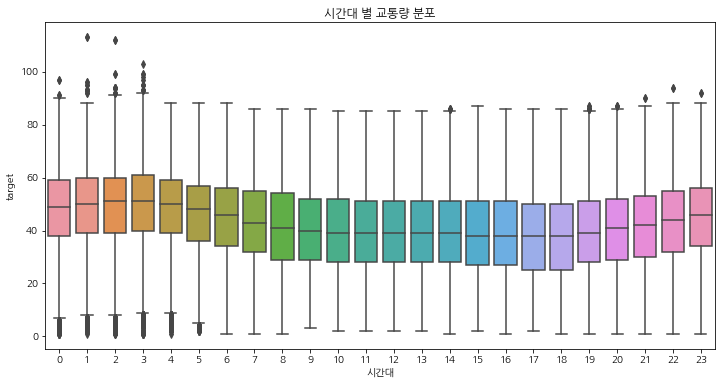

In [ ]:
#Q1.base_hour에 따른 교통량 분포를 알고 싶다.시간에 따른 교통량 분포를 확인하기 위한 box plot을 그리고 시간에 따라 교통량차이 유무 의견
import matplotlib as mpl
mpl.rcParams["font.family"]="NanumGothic"
plt.figure(figsize=(12,6))
sns.boxplot(x='base_hour',y='target',data=train)
plt.title("시간대 별 교통량 분포")
plt.xlabel("시간대")
plt.ylabel("target")
plt.show()

#00시-05시,18시-24시 교통량 감소, 05시-18시 교통량 증가

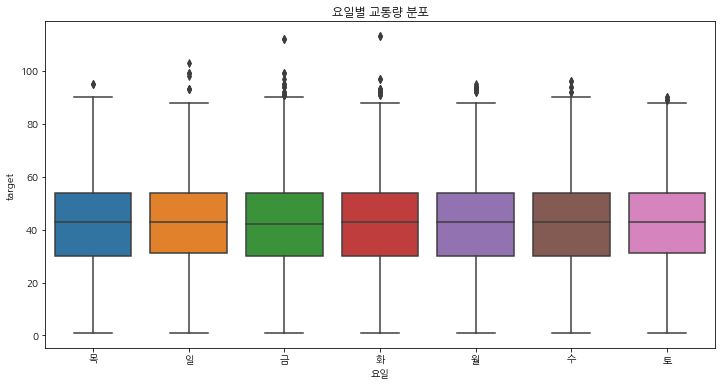

In [ ]:
#Q2 요일별 교통량 분포를 boxplot으로 그리고 요일별로 차이가 있는지
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='target', data=train)
plt.title("요일별 교통량 분포")
plt.xlabel("요일")
plt.ylabel("target")
plt.show()


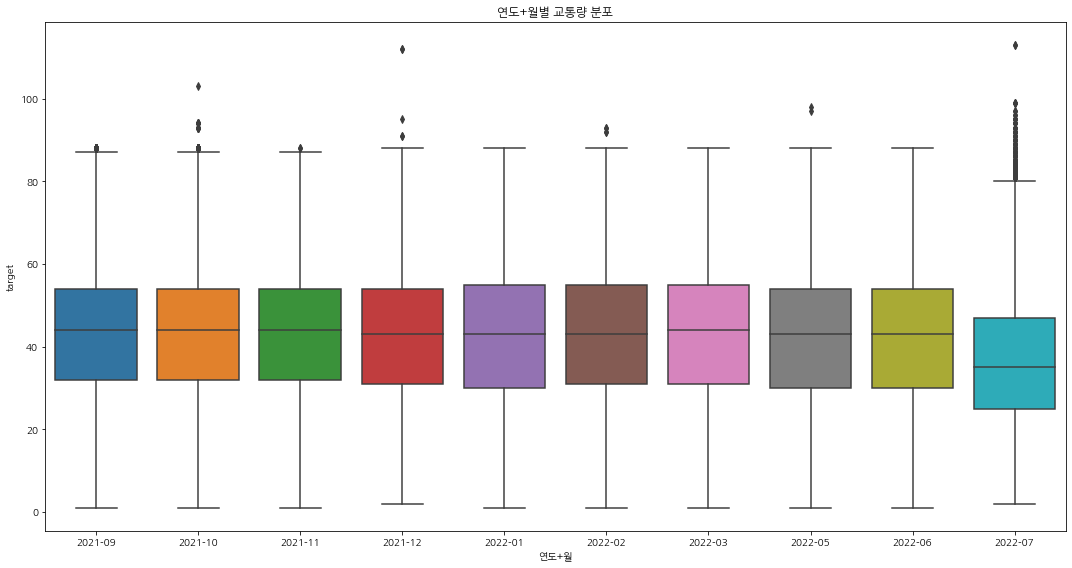

In [ ]:
#Q3) 연도+월별 교통량 분포를 box plot으로 그리고 시간이 흐름에 따라 교통량 차이가 있는지 의견 작성
train['base_date']=pd.to_datetime(train['base_date'],format="%Y%m%d")
#년도와 월 결합
train['year_month'] = train['base_date'].dt.to_period('M')
train_sorted = train.sort_values(by='year_month')


# 연도+월별 교통량 분포 box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='year_month', y='target', data=train_sorted)
plt.title("연도+월별 교통량 분포")
plt.xlabel("연도+월")
plt.ylabel("target")
plt.tight_layout()
plt.show()

#22년 7월빼고는 비슷비슷함(여름 휴가 시즌)

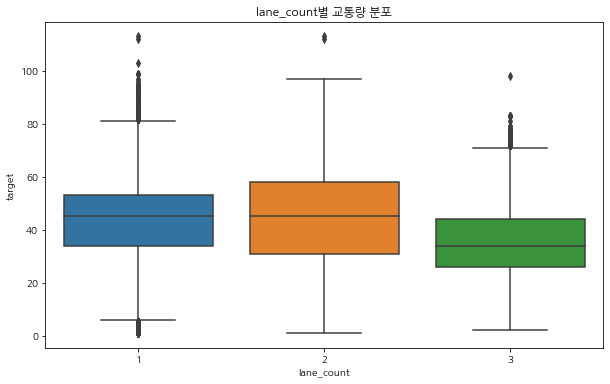

In [ ]:
#4.lane_count별 교통량 분포를 box plot으로 그리고 lane_count의 차이가 교통량 차이와 관련이 있을지 의견 작성

plt.figure(figsize=(10, 6))
sns.boxplot(x='lane_count', y='target', data=train)
plt.title("lane_count별 교통량 분포")
plt.xlabel("lane_count")
plt.ylabel("target")
plt.show()
#2차로가 iqr이 가장 넓고 3차로가 target제일 적음=교통량 많다

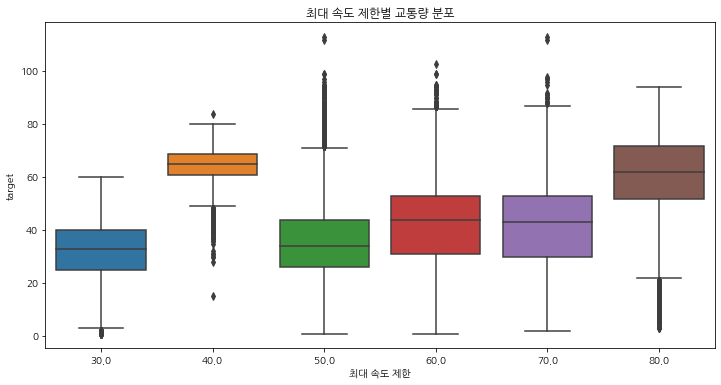

In [ ]:
#5.maximum speed limit별 교통량 분포를 확인하면 상식과 위배되는 구간이 하나 나오는데 그게 어떤 구간인지 작성

plt.figure(figsize=(12, 6))
sns.boxplot(x='maximum_speed_limit', y='target', data=train)
plt.title("최대 속도 제한별 교통량 분포")
plt.xlabel("최대 속도 제한")
plt.ylabel("target")
plt.show()
#속도 제한 40km에서 중앙값이 60으로, 상식적인 제한 속도를 크게 벗어나는 속도가 관측됨.


\Q6) box plot으로 분포 확인이 불가능한 변수가 있나? 있나/없나 에 대한 이유를 작성
분포 확인이 불가능한 변수가 있다. Id 같은 각 값이 고유한 변수는 중복이 되지 않기 때문에, 중앙값 같은 분포가 의미가 없다. 또한 base_date와 같은 순서형 데이터는 연속적인 값이라 범주화를 하지 않는 이상 패턴 파악이 어렵다.
Road_name같은 텍스트 기반의 변수도 수치화 되지 않았기 때문에 사분위수나 중앙값들을 boxplot으로 분포 확인할 수 없다.
Multi_linked와 같은 이진형 변수도 (예/아니오) 두 가지 값만 가지기 때문에, 두 범주간의 분포 차이를 효과적으로 나타내지 못한다. boxplot으로 분포를 확인할 때 적합한 변수들은, 주로 수치적인 정보를 갖고 있는 변수들이다.


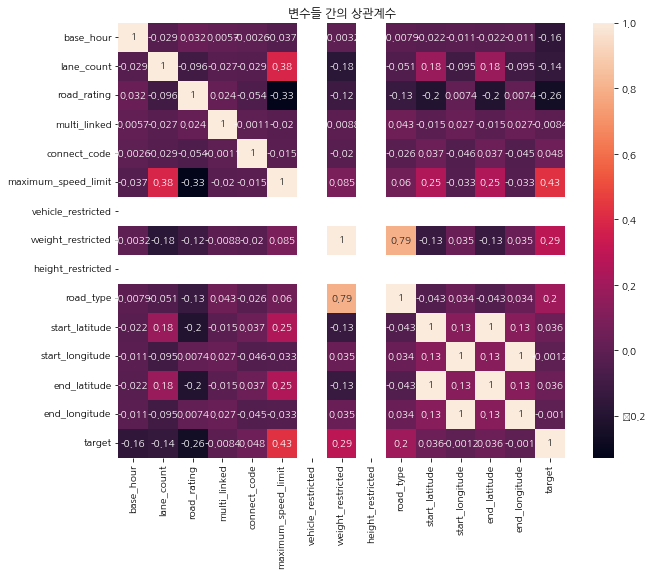

correlation_with_target target                 1.000000
maximum_speed_limit    0.425715
weight_restricted      0.294092
Name: target, dtype: float64


In [ ]:
#Q7)Q4에서 가능한 변수들 중 시각화를 통해 교통량과 상관이 제일 큰 것 같은 두 변수를 선택하고 두 변수에 따른 교통량 분포를 알기 위한
#heatmap 그리고 어떤 특성이 있는지 작성

# 수치형 데이터만 고려
numerical_data = train.select_dtypes(include=['float64', 'int64'])

# 상관계수 행렬 계산
correlation_matrix = numerical_data.corr()

# 교통량과 다른 변수들 간의 상관계수 확인
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('변수들 간의 상관계수')
plt.show()
print("correlation_with_target",correlation_with_target[:3])
#maximum_speed_limit변수와 weight_restricted 변수가 제일 교통량과 상관이 크다.


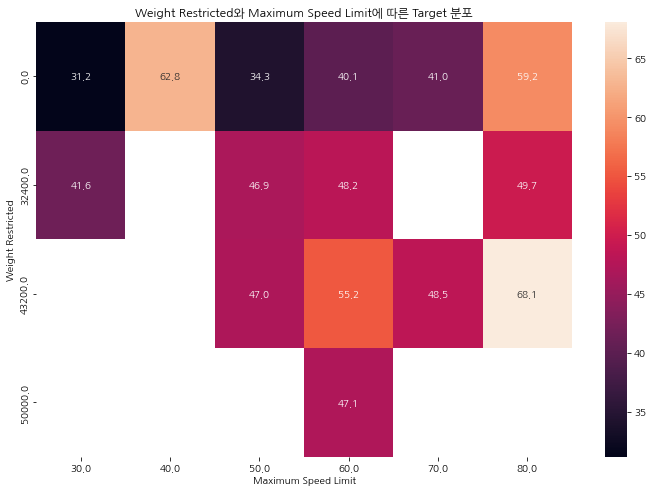

In [ ]:
#두 변수에 따른 교통량 분포를 알기 위한 heatmap

heatmap_data = train.pivot_table(values='target',
                                 index='weight_restricted',
                                 columns='maximum_speed_limit',
                                 aggfunc='mean')

# 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f")
plt.title('Weight Restricted와 Maximum Speed Limit에 따른 Target 분포')
plt.xlabel('Maximum Speed Limit')
plt.ylabel('Weight Restricted')
plt.show()
